# Object Detection with MobileNet

In [1]:
import cv2 as cv                 #Imports opencv-python
import matplotlib.pyplot as plt  #Imports pyplot module from matplotlib

In [2]:
# load the pre-trained model and its configurations into memory
frozen_model="./model/frozen_inference_graph.pb"
config_file="./model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [4]:
# create instance of dnn_DetectionModel for object detection using MobileNet
model = cv.dnn_DetectionModel(
    model=frozen_model,
    config=config_file
)

In [5]:
# initialize empty list to store object labels
class_labels = []

# load labels for objects from text file
file_name = "labels.txt"
with open (file_name,"rt") as fpt:
    class_labels = fpt.read().rstrip("\n").split("\n")

print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [25]:
#Preprocessing steps for input data
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000026B177A92D0>

In [26]:
#Loads sample image
image=cv.imread("./images/image_1.jpg")

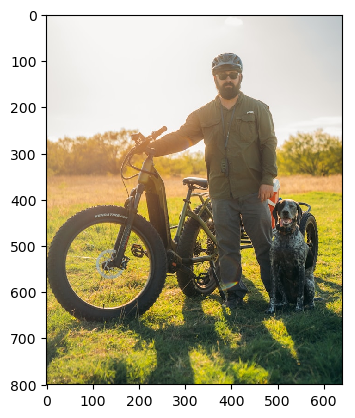

In [27]:
#Display sample image
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))

In [28]:
#Detect objects in the image using the MobileNet model
class_index,confidence,bounding_box_coordinates=model.detect(image,confThreshold=0.5)

In [29]:
#Show model outputs
print(class_index)

[ 1 18  4]


In [30]:
for class_index, confidence, bounding_boxes in zip(class_index.flatten(), confidence.flatten(), bounding_box_coordinates):
    
    #Draw bounding boxes on detected objects
    cv.rectangle(
        image,                #The image on which the bounding boxes must be drawn
        bounding_boxes,     #The positions and sizes of the bounding boxes
        (255,0,0),          #The color of the bounding boxes (in this case, blue)
        2                   #The thickness of the lines in the bounding boxes
    )
    
    #label the bounding boxes with the relevant class labels
    cv.putText(
        image,                                              #The image on which the bounding boxes are drawn
        class_labels[class_index-1],                      #The relevant class labels (obtained from the `class_index` list)
        (bounding_boxes[0]+10, bounding_boxes[1]+40),     #The location of the labels (near the top-left corner of the bounding boxes)
        fontFace=cv.FONT_HERSHEY_PLAIN,                  #The font of the labels on the bounding boxes
        fontScale=2,                                      #The font size of the labels
        color=(0,255,0),                                  #The font color of the labels
        thickness=3                                       #The thickness of the text of the labels
    )  

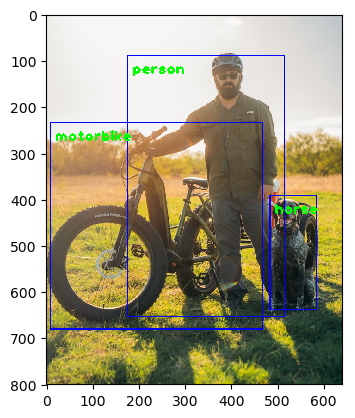

In [31]:
#Display object detected image
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))